In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd

In [4]:
df1 = pd.read_csv("torquato_hardspheres_1.txt")
df2 = pd.read_csv("torquato_hardspheres_2.txt")

In [5]:
print df1.head()
print df2.head()

     r     0.1     0.2     0.3
0  0.0  0.9000  0.8000  0.7000
1  0.4  0.8705  0.7411  0.6119
2  0.8  0.8441  0.6908  0.5418
3  1.2  0.8233  0.6539  0.4958
4  1.6  0.8104  0.6339  0.4758
     r     0.4     0.5    0.62
0  0.0  0.6000  0.5000  0.3800
1  0.4  0.4828  0.3546  0.2053
2  0.8  0.4003  0.2709  0.1416
3  1.2  0.3544  0.2360  0.1309
4  1.6  0.3417  0.2347  0.1405


In [30]:
title_size = 36
xLabel_size = 34
yLabel_size = xLabel_size
tick_mark_label_size = 28
legend_size = 32
line_width = 6
bbox = (0., 0.8, 1.0, .102)
bbox_comp = (0., 0.25, 0.95, .102)
gamma_alpha = 0.6

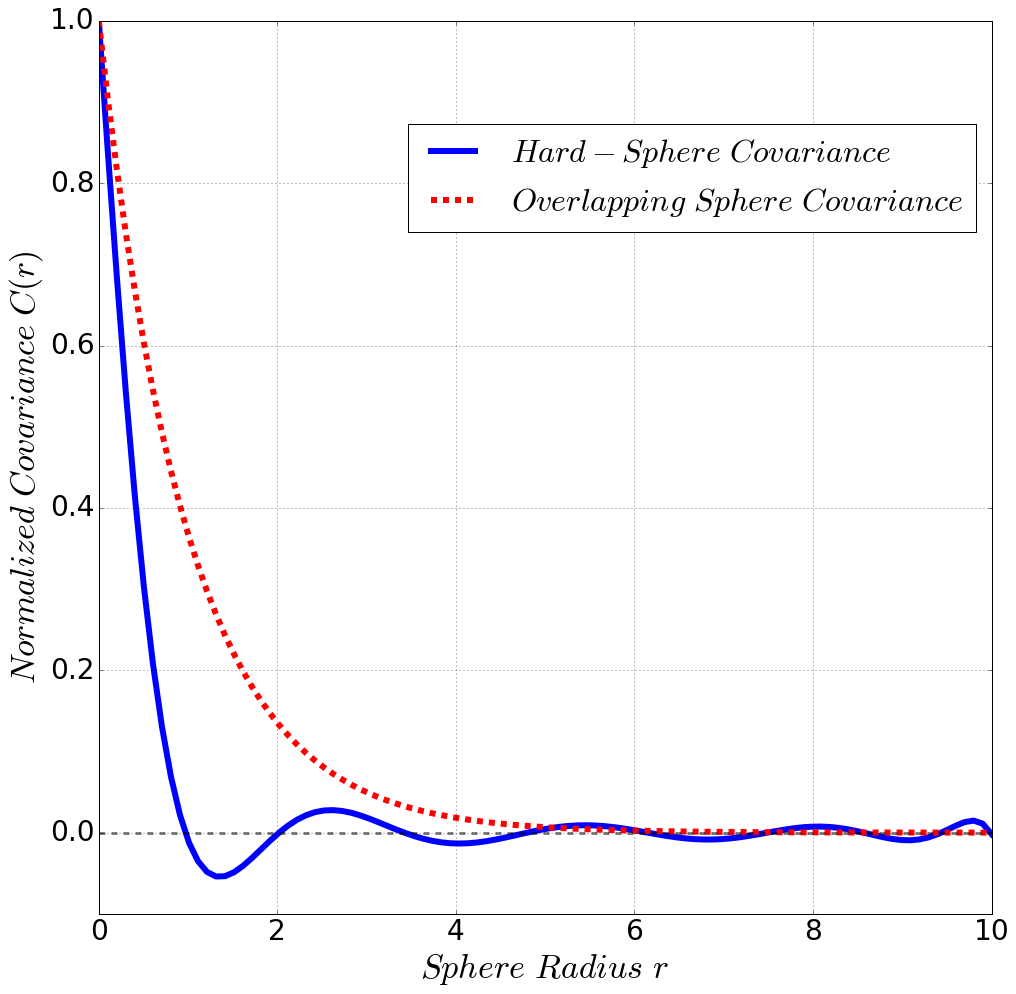

In [32]:
fig, ax = plt.subplots(figsize=(16,16))

ax.set_ylim(-0.1, 1.0)


#ax.set_title(r'$Normalized \ Covariance \ C(r)$', fontsize=title_size, y=1.02)

ax.set_xlabel(r'$Sphere \ Radius \ r$', fontsize=xLabel_size)
ax.set_ylabel(r'$Normalized \ Covariance \ C(r)$', fontsize=yLabel_size)

fit_cov = np.polyfit(df2["r"], df2["0.5"], 10)
poly_fit = np.poly1d(fit_cov)

x_fit = np.linspace(0, 10, 100)
plot_data = poly_fit(x_fit)


normalized_plot = (plot_data-plot_data[0]**2)/(plot_data[0]*(1-plot_data[0]))
exponential_plot  = np.exp(-1*x_fit)
ax.plot(x_fit, normalized_plot, label=r'$Hard-Sphere \ Covariance$', alpha=1.0, linestyle="-", linewidth=line_width, color="blue")
ax.plot(x_fit, exponential_plot, label=r'$Overlapping \ Sphere \ Covariance$', alpha=1.0, linestyle="--", linewidth=line_width, color="red")
ax.plot(x_fit, [0]*len(x_fit), alpha=0.5, linestyle="--", linewidth=3, color="black")
      
for item in ax.get_xticklabels():
    item.set_fontsize(tick_mark_label_size)
for item in ax.get_yticklabels():
    item.set_fontsize(tick_mark_label_size)

plt.grid()

legend = plt.legend(bbox_to_anchor=bbox, fontsize=legend_size)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

fig.savefig("covariance_results/hard_soft_spheres_figure_methodology.png", bbox_extra_artists=None, bbox_inches='tight', dpi=300)
plt.show()
plt.close()